In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [2]:
# Extract the data
df = pd.read_csv('C:\\Users\\jugue\\OneDrive\\Desktop\\Lamina\\Week 2\\netflix.csv')

In [3]:
df.head

<bound method NDFrame.head of             date        open        high         low       close    volume  \
0     2014-01-02   52.401428   52.511429   51.542858   51.831429  12325600   
1     2014-01-03   52.000000   52.495712   51.842857   51.871429  10817100   
2     2014-01-06   51.889999   52.044285   50.475716   51.367142  15501500   
3     2014-01-07   49.684284   49.698570   48.152859   48.500000  36167600   
4     2014-01-08   48.104286   49.425713   48.074287   48.712856  20001100   
...          ...         ...         ...         ...         ...       ...   
2511  2023-12-22  494.000000  496.019989  485.450012  486.760010   2701100   
2512  2023-12-26  489.390015  491.480011  486.380005  491.190002   2034500   
2513  2023-12-27  491.239990  494.019989  489.250000  491.790009   2561300   
2514  2023-12-28  492.000000  492.890015  489.070007  490.510010   1710500   
2515  2023-12-29  490.369995  492.230011  481.940002  486.880005   2739500   

          rsi_7     rsi_14       

In [4]:
# need to change the time format
df['date'] = pd.to_datetime(df.date)

        date       open       high        low      close    volume      rsi_7  \
0 2014-01-02  52.401428  52.511429  51.542858  51.831429  12325600  34.729664   
1 2014-01-03  52.000000  52.495712  51.842857  51.871429  10817100  35.587886   
2 2014-01-06  51.889999  52.044285  50.475716  51.367142  15501500  29.820674   
3 2014-01-07  49.684284  49.698570  48.152859  48.500000  36167600  14.371863   
4 2014-01-08  48.104286  49.425713  48.074287  48.712856  20001100  18.049045   

      rsi_14       cci_7      cci_14     sma_50     ema_50    sma_100  \
0  49.183584  -89.573201 -131.288579  50.112828  50.235157  46.385428   
1  49.457208  -65.820581 -103.026189  50.228771  50.299327  46.537571   
2  46.087900 -121.472559 -139.640566  50.312571  50.341203  46.680971   
3  32.522091 -206.762171 -238.029120  50.336228  50.268997  46.791957   
4  34.073549 -117.836707 -180.766801  50.373257  50.207969  46.917071   

     ema_100      macd  bollinger  TrueRange     atr_7    atr_14  \
0  46.

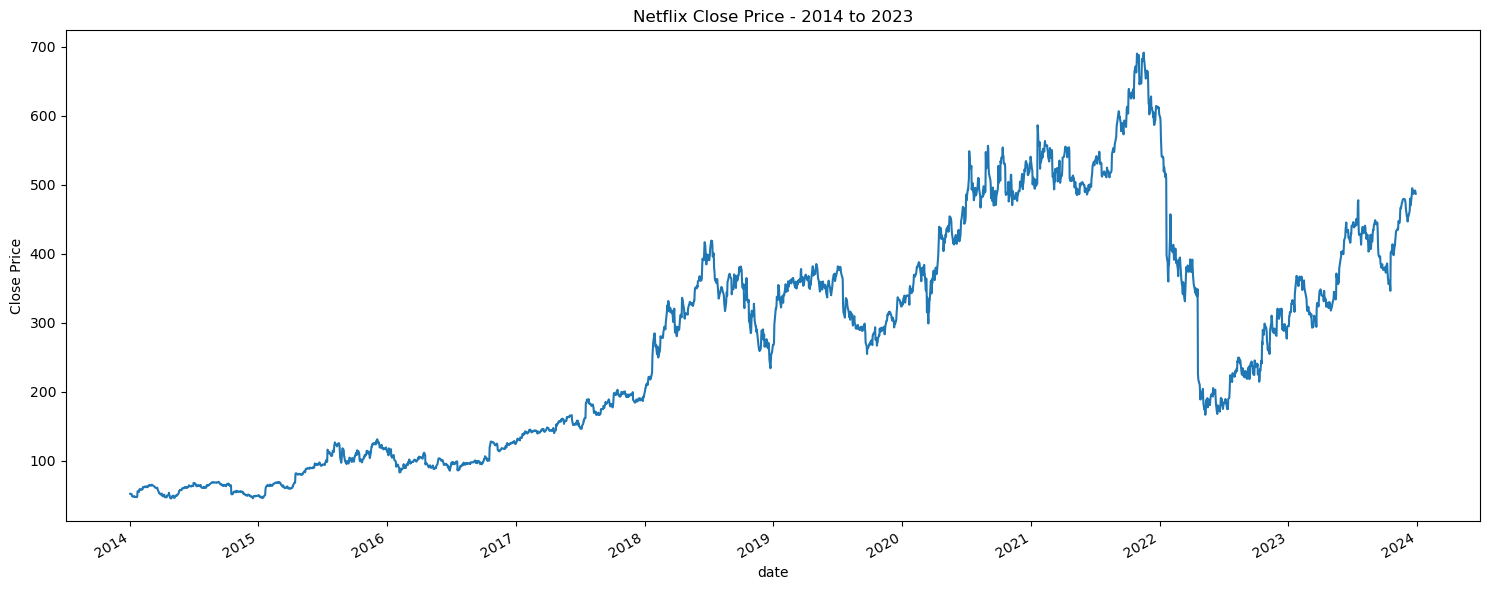

In [5]:

# Check if 'date' is already the index
print(df.head())  # Inspect the first few rows of the dataframe

# If 'date' is already the index, you can skip setting it again
if 'date' in df.columns:
    df.set_index('date', inplace=True)
else:
    print("The 'date' column is not in the dataframe. Please check the column names.")
    print("Available columns:", df.columns)

# plot the closing price which is what we want to predict using linear regression
plt.figure(figsize=(15,6))
plt.ylabel('Close Price')
plt.xlabel('Date')
plt.title("Netflix Close Price - 2014 to 2023")
df['close'].plot()  # Ensure 'close' is a valid column
plt.tight_layout()
plt.show()

In [6]:
# Train the model
x = df[['open','high','low','volume']] # this will be the feature dataset
# X = X[:int(len(df)-1)]

y = df['close'] # target dataset
# Y = Y[:int(len(df)-1)] # removing the last row

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

In [8]:
print(x_train.shape, y_train.shape) # to see the percentage of splitting, test and train

(2012, 4) (2012,)


In [9]:
# Create the model random forest

model = RandomForestRegressor()
model.fit(x_train, y_train) # fit is another term for train

RandomForestRegressor()

In [10]:
# printing the predicted value
predicted = model.predict(x_test)
print(x_test)
print(predicted)

                  open        high         low    volume
date                                                    
2017-05-04  155.589996  157.899994  154.550003   5582300
2019-01-10  314.570007  325.369995  312.500000  13472500
2016-04-15  110.639999  111.849998  109.779999  11746100
2017-10-02  182.110001  182.800003  176.580002   7342000
2023-01-17  331.079987  332.500000  323.600006   9247000
...                ...         ...         ...       ...
2021-01-04  539.000000  540.799988  515.090027   4444400
2014-10-09   66.661430   66.855713   65.651428  14928200
2014-10-02   62.700001   64.355713   62.554287  18450600
2023-05-30  397.480011  405.109985  385.790009  10865000
2016-11-25  117.639999  118.389999  117.180000   1616300

[504 rows x 4 columns]
[157.04670221 318.04969939 112.26420059 179.38499932 329.34649971
 175.72820187 184.17530157 488.08049746 315.75720001 404.85619381
  80.56634208 220.28650148  60.86912808 104.62689993 100.08229949
  67.80779965 505.57259652  95.339044

In [11]:
# Calculating the accuracy of the model
print("Model Accuracy:", model.score(x_test, y_test))

Model Accuracy: 0.9994442951272038


In [12]:
frame = pd.DataFrame({'Actual Value': y_test, "Predicted": predicted})
print(frame)

            Actual Value   Predicted
date                                
2017-05-04    157.250000  157.046702
2019-01-10    324.660004  318.049699
2016-04-15    111.510002  112.264201
2017-10-02    177.009995  179.384999
2023-01-17    326.220001  329.346500
...                  ...         ...
2021-01-04    522.859985  522.113711
2014-10-09     65.945717   66.300042
2014-10-02     64.282860   64.053386
2023-05-30    392.980011  394.426200
2016-11-25    117.410004  117.651002

[504 rows x 2 columns]


In [13]:
model.score(x_train, y_train)

0.9999296651639522

In [14]:
model.score(x_test, y_test)

0.9994442951272038

In [15]:
from sklearn import metrics
import math
# Mean Error indicates whether the model needs more adjustment of input, avoid overfitting, more inputs does not mean better result
print("Mean Absolute Error", metrics.mean_absolute_error(y_test, predicted))
print("Mean Square Error", metrics.mean_squared_error(y_test, predicted))
print("Root Mean Error", math.sqrt(metrics.mean_squared_error(y_test, predicted)))

Mean Absolute Error 2.538181831964303
Mean Square Error 15.218207024146297
Root Mean Error 3.9010520406867553


In [16]:
# Showing the predicted results and that will be passed on plotting later
predicted = model.predict(x)
print(predicted)

[ 51.81945743  52.4601433   51.28151346 ... 491.58910459 490.62760759
 488.1018036 ]


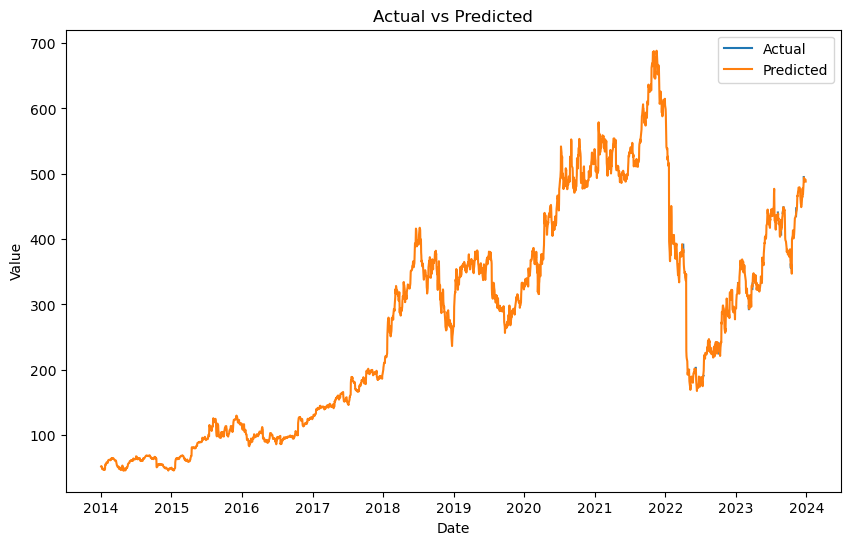

In [17]:
# Convert them to pandas Series with the same index
y_test_series = pd.Series(y_test, index=df.index[-len(y_test):]) #etong part na toh di
predicted_series = pd.Series(predicted, index=df.index[-len(predicted):])

# Plot the graph created by linear regression
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(y_test_series, label="Actual")
plt.plot(predicted_series, label="Predicted")
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Actual vs Predicted")
plt.legend()
plt.show()

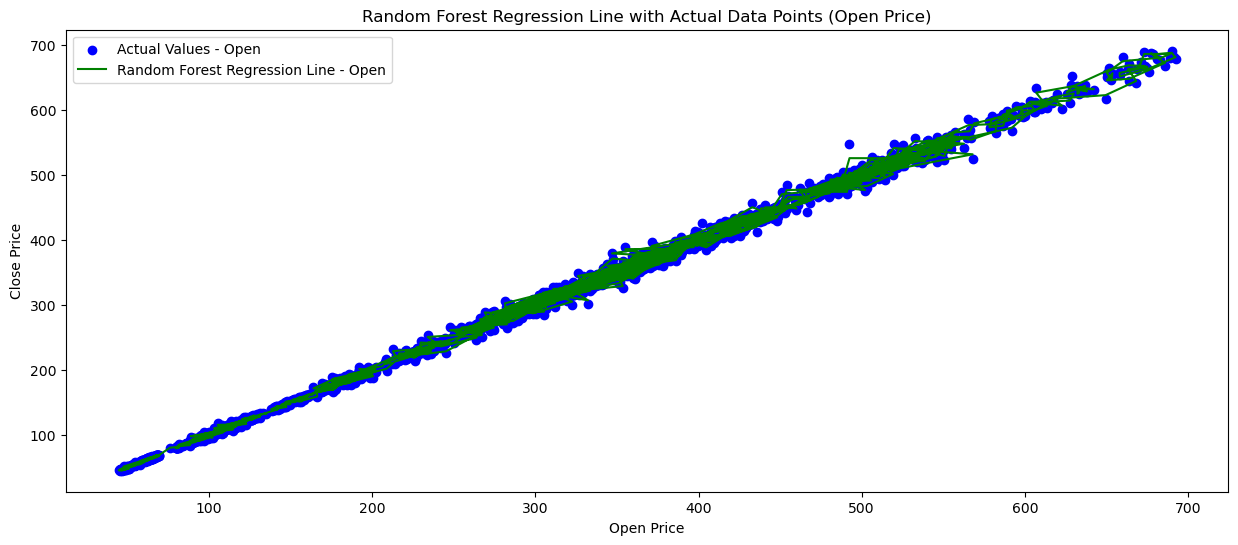

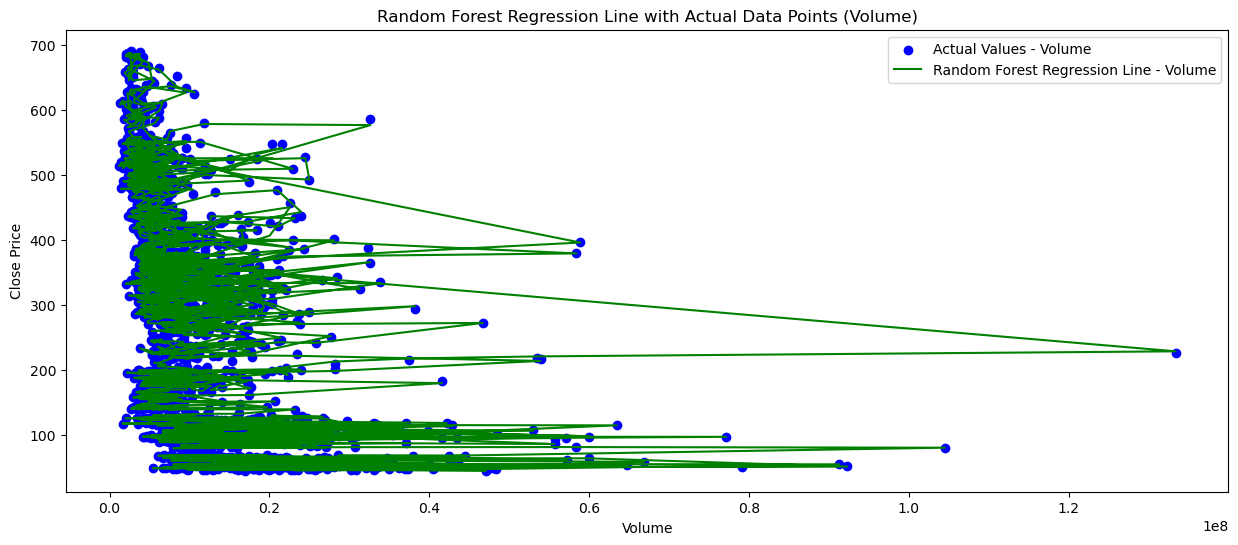

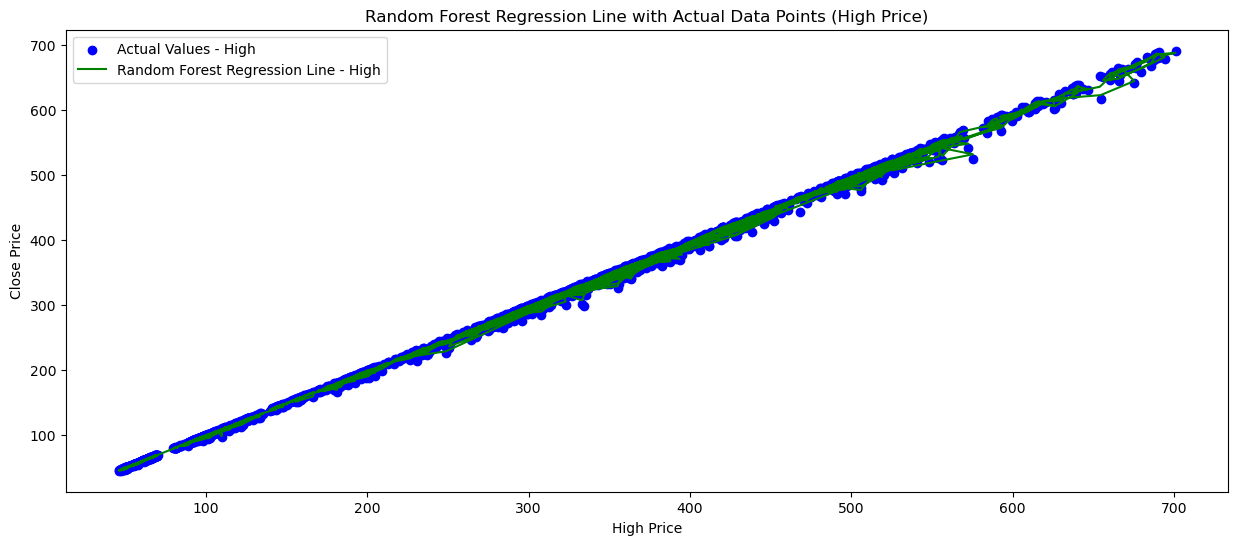

In [18]:
# Plot 'open' against 'close'
plt.figure(figsize=(15, 6))
plt.scatter(x['open'], y, color="blue", label="Actual Values - Open")
plt.plot(x['open'], model.predict(x), color="green", label="Random Forest Regression Line - Open")
plt.xlabel("Open Price")
plt.ylabel("Close Price")
plt.title("Random Forest Regression Line with Actual Data Points (Open Price)")
plt.legend()
plt.show()

# Plot 'volume' against 'close'
plt.figure(figsize=(15, 6))
plt.scatter(x['volume'], y, color="blue", label="Actual Values - Volume")
plt.plot(x['volume'], model.predict(x), color="green", label="Random Forest Regression Line - Volume")
plt.xlabel("Volume")
plt.ylabel("Close Price")
plt.title("Random Forest Regression Line with Actual Data Points (Volume)")
plt.legend()
plt.show()

# Plot 'high' against 'close'
plt.figure(figsize=(15, 6))
plt.scatter(x['high'], y, color="blue", label="Actual Values - High")
plt.plot(x['high'], model.predict(x), color="green", label="Random Forest Regression Line - High")
plt.xlabel("High Price")
plt.ylabel("Close Price")
plt.title("Random Forest Regression Line with Actual Data Points (High Price)")
plt.legend()
plt.show()

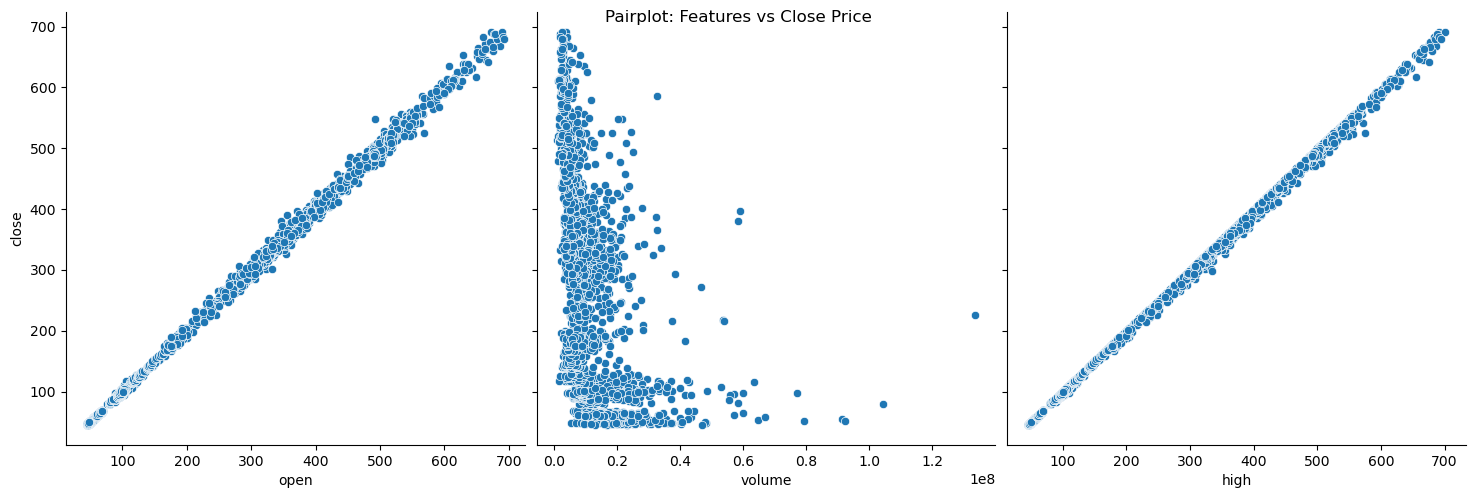

In [19]:
import seaborn as sns

# Combine x and y into a single DataFrame for seaborn
combined_df = x.copy()
combined_df['close'] = y

# Pairplot to visualize the relationships
sns.pairplot(combined_df, x_vars=['open', 'volume', 'high'], y_vars='close', height=5)
plt.suptitle("Pairplot: Features vs Close Price")
plt.show()